In [2]:
! pip install sentence-transformers

  Using cached sentence_transformers-5.1.2-py3-none-any.whl.metadata (16 kB)
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
Using cached sentence_transformers-5.1.2-py3-none-any.whl (488 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl (2.7 MB)
Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl (320 kB)

   -------- ------------------------------- 1/5 [huggingface-hub]
   -------- ------------------------------- 1/5 [huggingface-hub]
   -------- ------------------------------- 1/5 [huggingface-hub]
   -------- ------------------------------- 1/5 [huggingface-hub]
   -------- ------------------------------- 1/5 [h

In [5]:
! pip install chromadb

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
   ---------------------------------------- 0.0/20.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/20.8 MB 5.9 MB/s eta 0:00:04
   ----- ---------------------------------- 2.6/20.8 MB 7.1 MB/s eta 0:00:03
   ---------- ----------------------------- 5.2/20.8 MB 9.0 MB/s eta 0:00:02
   ---------------- ----------------------- 8.7/20.8 MB 11.2 MB/s eta 0:00:02
   -------------------------- ------------- 13.6/20.8 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------  20.4/20.8 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 20.8/20.8 MB

In [1]:
# Step 1: # Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# RAG Libraries
from sentence_transformers import SentenceTransformer
import chromadb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Save/Load Models
import joblib

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# DOWNLOAD NLTK DATA
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    print("NLTK data downloaded successfully!")
except:
    print("NLTK data already exists")

NLTK data downloaded successfully!


In [5]:
# Step 2: Load and Explore Data
df = pd.read_csv("Pyschological_data.csv")
print(df.head(3))
print(f"Dataset Shape: {df.shape}")

   Age  Gender Education_Level Employment_Status  Sleep_Hours  Anxiety_Score  \
0   56    Male      Bachelor's           Retired          6.0              4   
1   69  Female      Bachelor's           Retired          8.8             18   
2   46  Female        Master's          Employed          5.3              5   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                              0   
1                 7             6                              0   
2                13             8                              0   

   Chronic_Illnesses Substance_Use  Financial_Stress  Work_Stress  \
0                  0          none                 4            3   
1                  0          none                 1            4   
2                  0          none                 8            7   

   Self_Esteem_Score  Loneliness_Score  \
0                  7                 1   
1                  7                 6   
2  

In [6]:
# Display basic info
print(f"\nColumn Names:\n{df.columns.tolist()}")


Column Names:
['Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours', 'Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Loneliness_Score', 'Text']


# Exploratory Data Analysis 

In [7]:
df.describe()

,Age,Sleep_Hours,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Financial_Stress,Work_Stress,Self_Esteem_Score,Loneliness_Score
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,45.440092,6.514352,10.446675,9.820935,5.063199,0.378868,0.294602,5.002304,3.991442,5.904213,5.306122
std,16.916037,1.524515,5.154347,5.323718,2.501226,0.485185,0.455939,2.569097,3.378532,2.538808,2.650992
min,18.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,30.000000,5.100000,6.000000,5.000000,3.000000,0.000000,0.000000,3.000000,0.000000,4.000000,3.000000
50%,45.000000,6.400000,10.000000,10.000000,5.000000,0.000000,0.000000,5.000000,4.000000,6.000000,5.000000
75%,61.000000,7.800000,15.000000,14.000000,7.000000,1.000000,1.000000,7.000000,7.000000,8.000000,8.000000
max,76.000000,12.400000,20.000000,20.000000,10.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000


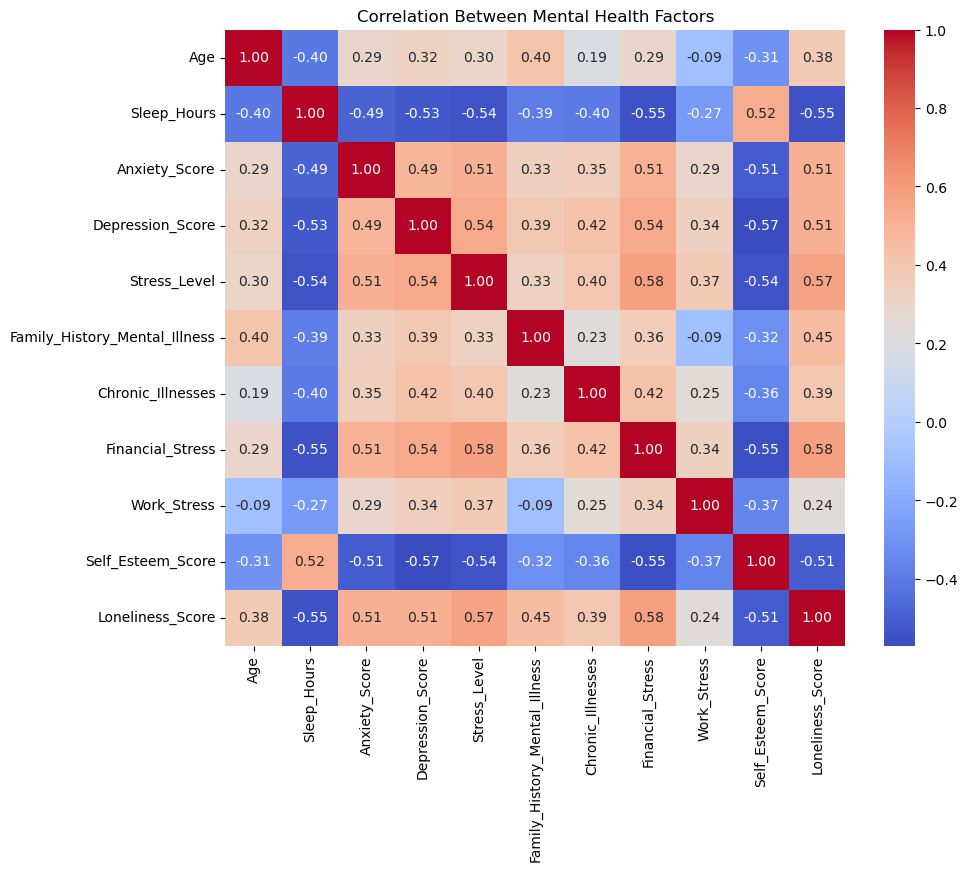

In [8]:
# 1. Correlation Heatmap — To find most related mental factors 
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Generate the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Mental Health Factors")
plt.show()

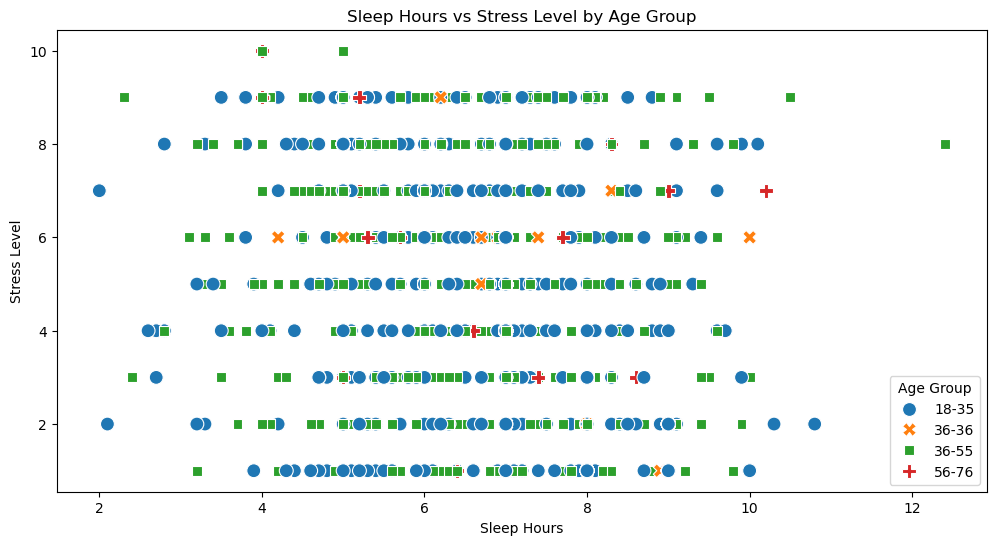

In [9]:
# Sleep Hours vs Stress Level — To understand stress and rest balance
# Grouping by age
bins = [18, 35, 36, 55, 56]
labels = ['18-35', '36-36', '36-55', '56-76']  
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sleep_Hours', y='Stress_Level', hue='Age_Group', style='Age_Group', s=100)
plt.title('Sleep Hours vs Stress Level by Age Group')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.legend(title='Age Group')
plt.show()

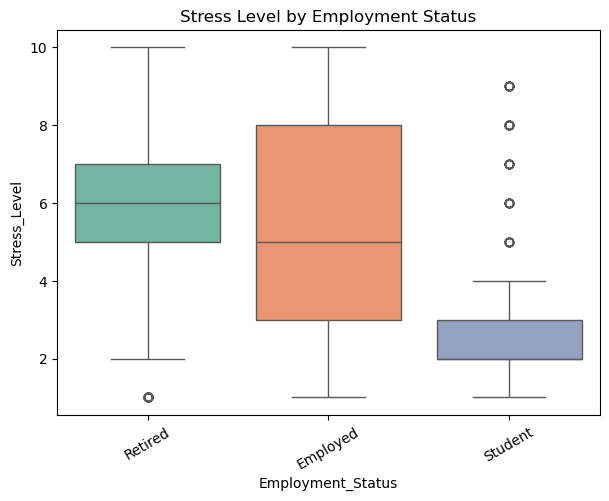

In [10]:
# 3. Employment Status vs Stress Level — Work-related stress indicator
plt.figure(figsize=(7,5))
sns.boxplot(x='Employment_Status', y='Stress_Level', data=df, palette='Set2')
plt.title("Stress Level by Employment Status")
plt.xticks(rotation=30)
plt.show()

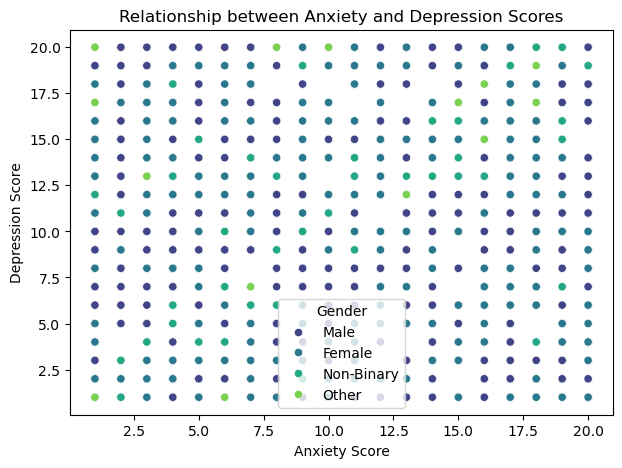

In [11]:
# 4. Anxiety vs Depression — Emotional factor relationship
plt.figure(figsize=(7,5))
sns.scatterplot(x='Anxiety_Score', y='Depression_Score', hue='Gender',data=df, palette='viridis')
plt.title("Relationship between Anxiety and Depression Scores")
plt.xlabel("Anxiety Score")
plt.ylabel("Depression Score")
plt.show()

In [12]:
# Create a burnout score formula
df["Burnout_Score"] = (
    (df["Stress_Level"] * 0.3) +
    (df["Financial_Stress"] * 0.2) +
    (df["Work_Stress"] * 0.2) +
    (df["Loneliness_Score"] * 0.15) +
    ((10 - df["Sleep_Hours"]) * 0.1) +     # less sleep increases burnout
    ((10 - df["Self_Esteem_Score"]) * 0.05)  # lower self-esteem increases burnout
)
# Optional normalization: limit between 0–10
df["Burnout_Score"] = df["Burnout_Score"].clip(0, 10)

In [13]:
# STEP 4: CREATE TARGET LABELS
def classify_mental_health(row):
    """
    Classify based on Depression and Stress scores
    Depression Score > 7 = Depression
    Burnout Score > 4 = Burnout
    Both conditions = Both
    """
    depression_threshold = 7
    burnout_threshold = 4
    
    is_depressed = row['Depression_Score'] > depression_threshold
    is_burnout = row['Burnout_Score'] > burnout_threshold
    
    if is_depressed and is_burnout:
        return 'Both'
    elif is_depressed:
        return 'Depression'
    elif is_burnout:
        return 'Burnout'
    else:
        return 'Healthy'

# Create target variable
df['Mental_Health_Status'] = df.apply(classify_mental_health, axis=1)

print("\n=== TARGET VARIABLE DISTRIBUTION ===")
print(df['Mental_Health_Status'].value_counts())
print(f"\nPercentage Distribution:\n{df['Mental_Health_Status'].value_counts(normalize=True) * 100}")


=== TARGET VARIABLE DISTRIBUTION ===
Mental_Health_Status
Both          1524
Healthy        736
Burnout        404
Depression     374
Name: count, dtype: int64

Percentage Distribution:
Mental_Health_Status
Both          50.164582
Healthy       24.226465
Burnout       13.298223
Depression    12.310731
Name: proportion, dtype: float64


In [14]:
# Step 4: Text Preprocessing (NLP)
def clean_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)


In [15]:
# Apply text cleaning
print("\n=== TEXT PREPROCESSING ===")
df['Cleaned_Text'] = df['Text'].apply(clean_text)
print("Text cleaning completed!")
print(f"\nExample:\nOriginal: {df['Text'].iloc[0][:100]}...")
print(f"Cleaned: {df['Cleaned_Text'].iloc[0][:100]}...")


=== TEXT PREPROCESSING ===
Text cleaning completed!

Example:
Original: advice please  hey everyone please help me im so convinced i have a brain tumor okay so a week ago i...
Cleaned: advice please hey everyone please help convinced brain tumor okay week ago noticed head pressure mai...


In [16]:
# Step 5: Feature Engineering
# Text length features
df['Text_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))
df['Char_Count'] = df['Text'].apply(lambda x: len(str(x)))


# Encode categorical variables
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_employment = LabelEncoder()
le_substance = LabelEncoder()

df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])
df['Education_Encoded'] = le_education.fit_transform(df['Education_Level'])
df['Employment_Encoded'] = le_employment.fit_transform(df['Employment_Status'])
df['Substance_Encoded'] = le_substance.fit_transform(df['Substance_Use'])

print("Feature engineering completed!")

Feature engineering completed!


In [17]:
# Step 6: Prepare Features for ML Model
# Select features
feature_columns = [
    'Age', 'Gender_Encoded', 'Education_Encoded', 'Employment_Encoded',
    'Sleep_Hours', 'Anxiety_Score', 'Stress_Level',
    'Family_History_Mental_Illness', 'Chronic_Illnesses',
    'Substance_Encoded', 'Financial_Stress', 'Work_Stress',
    'Self_Esteem_Score', 'Loneliness_Score', 'Text_Length', 'Char_Count'
]
X = df[feature_columns]
y = df['Mental_Health_Status']

In [18]:
print("\n=== FEATURE MATRIX ===")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used:\n{feature_columns}")


=== FEATURE MATRIX ===
Features shape: (3038, 16)
Target shape: (3038,)

Features used:
['Age', 'Gender_Encoded', 'Education_Encoded', 'Employment_Encoded', 'Sleep_Hours', 'Anxiety_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Substance_Encoded', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Loneliness_Score', 'Text_Length', 'Char_Count']


In [19]:
# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n=== DATA SPLIT ===")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


=== DATA SPLIT ===
Training set: (2430, 16)
Test set: (608, 16)


In [20]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== FEATURE SCALING ===")
print("Features scaled successfully!")


=== FEATURE SCALING ===
Features scaled successfully!


In [21]:
# Step 8: Train ML Model
model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,class_weight='balanced')

model.fit(X_train_scaled, y_train)
print("✓ Model training completed!")

✓ Model training completed!


In [22]:
print("\n=== MODEL EVALUATION ===")

# Prediction 
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== MODEL EVALUATION ===

Model Accuracy: 82.73%

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

        Both       0.82      0.93      0.87       305
     Burnout       0.71      0.42      0.53        81
  Depression       0.69      0.76      0.72        75
     Healthy       0.97      0.88      0.92       147

    accuracy                           0.83       608
   macro avg       0.80      0.75      0.76       608
weighted avg       0.83      0.83      0.82       608


=== CONFUSION MATRIX ===
[[283  11  11   0]
 [ 44  34   3   0]
 [ 11   3  57   4]
 [  6   0  12 129]]


In [23]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)

print("\n=== TOP 10 IMPORTANT FEATURES ===")
print(feature_importance.head(10))


=== TOP 10 IMPORTANT FEATURES ===
              Feature  Importance
6        Stress_Level    0.136976
12  Self_Esteem_Score    0.133169
11        Work_Stress    0.119907
10   Financial_Stress    0.113805
13   Loneliness_Score    0.100790
4         Sleep_Hours    0.097108
5       Anxiety_Score    0.090769
0                 Age    0.048031
15         Char_Count    0.028936
14        Text_Length    0.028550


# SETUP RAG SYSTEM

In [ ]:
print("\n=== SETTING UP RAG SYSTEM ===")

# Initialize embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize ChromaDB
chroma_client = chromadb.Client()

# Create collection
try:
    chroma_client.delete_collection("mental_health_recommendations")
except:
    pass

collection = chroma_client.create_collection("mental_health_recommendations")

In [ ]:
# Mental health recommendations database
recommendations_db = {
    'Depression': [
        "Consider seeking professional help from a mental health therapist or counselor.",
        "Practice mindfulness and meditation for 10-15 minutes daily.",
        "Maintain a regular sleep schedule of 7-9 hours per night.",
        "Engage in physical activity for at least 30 minutes, 5 days a week.",
        "Connect with friends and family regularly for social support.",
        "Consider cognitive behavioral therapy (CBT) techniques.",
        "Limit alcohol and avoid recreational drugs.",
        "Keep a mood journal to track patterns and triggers."
    ],
    'Burnout': [
        "Set clear boundaries between work and personal life.",
        "Take regular breaks during work (5-10 minutes every hour).",
        "Practice stress management techniques like deep breathing.",
        "Delegate tasks when possible and learn to say no.",
        "Ensure adequate sleep and maintain a healthy diet.",
        "Engage in hobbies and activities you enjoy outside of work.",
        "Consider discussing workload with your supervisor or HR.",
        "Take vacation time to disconnect and recharge."
    ],
    'Both': [
        "Seek immediate professional help from a mental health specialist.",
        "Consider a combination of therapy and medical consultation.",
        "Implement both stress management and depression coping strategies.",
        "Evaluate your work situation and consider temporary leave if needed.",
        "Build a strong support system with friends, family, and professionals.",
        "Practice self-compassion and avoid self-criticism.",
        "Create a structured daily routine with self-care activities.",
        "Monitor your mental health closely and track improvements."
    ],
    'Healthy': [
        "Maintain your current healthy lifestyle and habits.",
        "Continue regular exercise and balanced nutrition.",
        "Practice preventive mental health care through mindfulness.",
        "Stay socially connected with loved ones.",
        "Keep a healthy work-life balance.",
        "Regular health check-ups and self-assessment.",
        "Continue engaging in activities that bring you joy.",
        "Be aware of early warning signs and address them promptly."
    ]
}


In [ ]:
# Add recommendations to ChromaDB
doc_id = 0
for condition, recommendations in recommendations_db.items():
    for rec in recommendations:
        embedding = embedding_model.encode(rec).tolist()
        collection.add(
            embeddings=[embedding],
            documents=[rec],
            metadatas=[{"condition": condition}],
            ids=[f"rec_{doc_id}"]
        )
        doc_id += 1

In [ ]:
print("RAG system setup completed!")
print(f"Total recommendations in database: {doc_id}")

In [ ]:
# Save model and preprocessing objects
print("\n=== SAVING MODELS ===")
import os

# Define the directory
directory = r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project"
models_directory = os.path.join(directory, 'models')


# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save ML model
joblib.dump(model, os.path.join(directory, 'models/burnout_depression_model.pkl'))
joblib.dump(scaler, os.path.join(directory, 'models/scaler.pkl'))

# Save Encoders
joblib.dump(le_gender, os.path.join(directory, 'models/gender_encoder.pkl'))
joblib.dump(le_education, os.path.join(directory, 'models/education_encoder.pkl'))
joblib.dump(le_employment, os.path.join(directory, 'models/employment_encoder.pkl'))
joblib.dump(le_substance, os.path.join(directory, 'models/substance_encoder.pkl'))

# Save feature Columns
joblib.dump(feature_columns, os.path.join(directory, 'models/feature_columns.pkl'))

print("All models saved successfully!")

In [ ]:
# Step 12: Prediction Function For New User
def predict_new_user(user_data):
    """
    Predict mental health status for a new user
    user_data: dictionary with user information
    """

     # Load saved models
    model = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\burnout_depression_model.pkl")
    scaler = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\scaler.pkl")
    le_gender = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\gender_encoder.pkl")
    le_education = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\education_encoder.pkl")
    le_employment = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\employment_encoder.pkl")
    le_substances = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\substance_encoder.pkl")
    feature_columns = joblib.load(r"C:\Users\HP\OneDrive\Desktop\burnout_depression_project\models\feature_columns.pkl")
    
    # Preprocess text
    cleaned_text = clean_text(user_data['Text'])
    text_length = len(cleaned_text.split())
    char_count = len(user_data['Text'])
    
    # Encode categorical variables
    try:
        gender_encoded = le_gender.transform([user_data['Gender']])[0]
        education_encoded = le_education.transform([user_data['Education_Level']])[0]
        employment_encoded = le_employment.transform([user_data['Employment_Status']])[0]
        substance_encoded = le_substance.transform([user_data['Substance_Use']])[0]
    except:
        # Handle unseen categories
        gender_encoded = 0
        education_encoded = 0
        employment_encoded = 0
        substance_encoded = 0

            # Create feature vector
    features = pd.DataFrame({
        'Age': [user_data['Age']],
        'Gender_Encoded': [gender_encoded],
        'Education_Encoded': [education_encoded],
        'Employment_Encoded': [employment_encoded],
        'Sleep_Hours': [user_data['Sleep_Hours']],
        'Anxiety_Score': [user_data['Anxiety_Score']],
        'Stress_Level': [user_data['Stress_Level']],
        'Family_History_Mental_Illness': [user_data['Family_History_Mental_Illness']],
        'Chronic_Illnesses': [user_data['Chronic_Illnesses']],
        'Substance_Encoded': [substance_encoded],
        'Financial_Stress': [user_data['Financial_Stress']],
        'Work_Stress': [user_data['Work_Stress']],
        'Self_Esteem_Score': [user_data['Self_Esteem_Score']],
        'Loneliness_Score': [user_data['Loneliness_Score']],
        'Text_Length': [text_length],
        'Char_Count': [char_count]
    })
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0]
    
    # Get class labels
    classes = model.classes_
    prob_dict = dict(zip(classes, probability))
    
    return prediction, prob_dict

In [ ]:
# RAG RECOMMENDATION FUNCTION
def get_recommendations(prediction, user_text, top_k=5):
    """
    Get personalized recommendations using RAG
    """
    # Encode user text
    query_embedding = embedding_model.encode(user_text).tolist()
    
    # Query ChromaDB
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_k * 2,
        where={"condition": prediction}
    )
    
    recommendations = []
    seen = set()
    
    # Get unique recommendations
    for doc in results['documents'][0]:
        if doc not in seen:
            recommendations.append(doc)
            seen.add(doc)
        if len(recommendations) >= top_k:
            break
    
    return recommendations

In [ ]:
# COMPLETE PREDICTION PIPELINE
def analyze_new_user(user_data):
    """
    Complete analysis pipeline for new user
    """
    print("\n" + "="*60)
    print("MENTAL HEALTH ANALYSIS REPORT")
    print("="*60)
    
    # Predict
    prediction, probabilities = predict_new_user(user_data)
    
    # Display results
    print(f"\n👤 USER PROFILE:")
    print(f"   Age: {user_data['Age']}")
    print(f"   Gender: {user_data['Gender']}")
    print(f"   Sleep Hours: {user_data['Sleep_Hours']}")
    print(f"   Anxiety Score: {user_data['Anxiety_Score']}")
    print(f"   Depression Score: {user_data.get('Depression_Score', 'N/A')}")
    print(f"   Stress Level: {user_data['Stress_Level']}")
    
    print(f"\n🔍 DIAGNOSIS:")
    print(f"   Status: {prediction}")
    
    print(f"\n📊 CONFIDENCE SCORES:")
    for condition, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
        print(f"   {condition}: {prob*100:.2f}%")
    
    # Ensure prediction is a valid string for the query
    if isinstance(prediction, str) and prediction:
        recommendations = get_recommendations(prediction, user_data['Text'])
    else:
        print("Error: Invalid prediction value.")
        return None, None, None
    
    print(f"\n💡 PERSONALIZED RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations, 1):
        print(f"   {i}. {rec}")
    
    print(f"\n⚠️  RISK ASSESSMENT:")
    if prediction == 'Both':
        print("   ⚠️  HIGH RISK: Both burnout and depression detected.")
        print("   Please seek immediate professional help.")
    elif prediction == 'Depression':
        print("   ⚠️  MODERATE RISK: Depression indicators detected.")
        print("   Consider consulting a mental health professional.")
    elif prediction == 'Burnout':
        print("   ⚠️  MODERATE RISK: Burnout indicators detected.")
        print("   Take steps to reduce stress and improve work-life balance.")
    else:
        print("   ✅ LOW RISK: Mental health indicators are within normal range.")
        print("   Continue maintaining healthy habits.")
    
    print("\n" + "="*60)
    
    return prediction, probabilities, recommendations

# ============================================
# STEP 17: TEST WITH NEW USER
# ============================================
print("\n\n" + "="*60)
print("TESTING WITH NEW USER")
print("="*60)

# Example new user data
new_user = {
    'Age': 28,
    'Gender': 'Female',
    'Education_Level': "Bachelor's",
    'Employment_Status': 'Employed',
    'Sleep_Hours': 5.0,
    'Anxiety_Score': 16,
    'Depression_Score': 14,
    'Stress_Level': 9,
    'Family_History_Mental_Illness': 1,
    'Chronic_Illnesses': 0,
    'Substance_Use': 'none',
    'Financial_Stress': 8,
    'Work_Stress': 9,
    'Self_Esteem_Score': 3,
    'Loneliness_Score': 8,
    'Text': "I feel so overwhelmed with work and life. I can't sleep properly and constantly feel anxious. I don't enjoy anything anymore and feel exhausted all the time. I'm worried about my job and finances."
}

# Analyze new user
prediction, probabilities, recommendations = analyze_new_user(new_user)

print("\n✅ ANALYSIS COMPLETE!")
print("\nYou can now use the 'analyze_new_user()' function with any new user data.")

In [ ]:
print("\n=== CREATING VISUALIZATIONS ===")

# Plot 1: Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot 2: Feature Importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

# Plot 3: Class Distribution
plt.figure(figsize=(10, 6))
df['Mental_Health_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Mental Health Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()